## Initial PATH

In [1]:
import os
ROOT_PATH = "/home/jovyan/ChestXray-14"
INPUT_PATH = "/home/jovyan/ChestXray-14/dataset/ChestXray NIH"
INPUT_PATH = os.path.abspath(INPUT_PATH)

BATCH_SIZE = 16
IMG_SIZE = 224
SEED = 42

In [2]:
EXPERIMENT_NAME = "Under_Sampling_on_fold_3_dataset"
OUT_PATH = os.path.abspath(f"{INPUT_PATH}/data/{EXPERIMENT_NAME}")
OUT_PATH

'/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/Under_Sampling_on_fold_3_dataset'

In [3]:
OUT_TRAIN_PATH = OUT_PATH + "/train"
OUT_TEST_PATH = OUT_PATH + "/test"

In [4]:
from pathlib import Path
Path(OUT_TRAIN_PATH).mkdir(parents=True, exist_ok=True)
Path(OUT_TEST_PATH).mkdir(parents=True, exist_ok=True)

In [5]:
if not (Path(OUT_TRAIN_PATH).exists() and Path(OUT_TEST_PATH).exists()):
    print(f"PATH create `{OUT_TRAIN_PATH}`")
    print(f"PATH create `{OUT_TEST_PATH}`")
else:
    if Path(OUT_TRAIN_PATH).exists():
        print(f"PATH `{OUT_TRAIN_PATH}` already exist!")
    
    if Path(OUT_TEST_PATH).exists():
        print(f"PATH `{OUT_TEST_PATH}/test` already exist!")

PATH `/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/Under_Sampling_on_fold_3_dataset/train` already exist!
PATH `/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/Under_Sampling_on_fold_3_dataset/test/test` already exist!


## Load Full Dataset

In [6]:
import pandas as pd
DEFAULT_DISPLAY_ROWS = 5 # defualt is 10
pd.set_option('display.max_rows', DEFAULT_DISPLAY_ROWS)

In [7]:
FILE_PATH = f"{INPUT_PATH}/preprocessed_data.csv"

In [8]:
df = pd.read_csv(FILE_PATH, index_col=0)
df = df.reset_index()
df["index"] = df["index"].apply(
    lambda x: os.path.abspath(f"{ROOT_PATH}/{x}")
)
df = df.set_index("index")
df

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030804_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030805_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Preprocessing

In [9]:
import numpy as np
import sys
sys.path.append('/home/jovyan/ChestXray-14')

In [10]:
from tqdm.notebook import tqdm
from modules.utils import serialize_fold

2023-03-10 16:30:03.851164: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.utils import shuffle

df = df.astype("int16")
df = shuffle(df, random_state=SEED)
df1, df2, df3, df4, df5 = np.split(df, 5)
NUM_TO_SPLIT_FILES = 100

In [13]:
df_train = pd.concat([df1, df2, df4, df5])
df_test = df3

In [14]:
df_train

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00022260_003.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012048_007.png,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000211_014.png,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00004169_002.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
count_class = {}
for each_class in df_train.columns[:] :
    df_new = df_train[each_class].value_counts() 
    count_class[df_new.name] = [df_new[1]]
    
df_count_class = pd.DataFrame(count_class).T
df_count_class.set_axis(["Count"], axis="columns", inplace=True)

df_count_class.T

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,48244,9226,3739,15900,4224,1836,2017,1336,10655,1154,2711,2201,5082,4641,175


In [16]:
df_count_class

,Count
No Finding,48244
Atelectasis,9226
...,...
Mass,4641
Hernia,175


In [17]:
number_of_no_finding_class = np.ceil(df_count_class.mean().values).astype('int16')[0]
number_of_no_finding_class

7543

In [18]:
df_without_no_finding = df_train.copy()
no_finding_condition = df_train[df_train["No Finding"] == 1].index

df_without_no_finding.drop(no_finding_condition, inplace=True)
df_without_no_finding

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012048_007.png,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00002275_007.png,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030028_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000211_014.png,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [19]:
df_new_no_finding = df_train[df_train["No Finding"] == 1].copy()
df_new_no_finding = df_new_no_finding.sample(n=number_of_no_finding_class, random_state=SEED)

df_new_no_finding

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00003587_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00011456_004.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012633_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_004/images/00007060_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
new_df_train = pd.concat([df_without_no_finding, df_new_no_finding])
new_df_train = new_df_train.sample(frac=1, random_state=SEED).reset_index()
new_df_train = new_df_train.set_index('index')
new_df_train.to_csv(os.path.abspath(f"{INPUT_PATH}/{EXPERIMENT_NAME}.csv"))

new_df_train

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00001701_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00023190_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00020429_003.png,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027919_000.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
count_class = {}
for each_class in new_df_train.columns[:] :
    df_new = new_df_train[each_class].value_counts() 
    count_class[df_new.name] = [df_new[1]]
    
df_count_class_new = pd.DataFrame(count_class).T
df_count_class_new.set_axis(["Count"], axis="columns", inplace=True)
df_count_class_new.to_csv(os.path.abspath(f"{INPUT_PATH}/{EXPERIMENT_NAME}_class_describe.csv"))

df_count_class_new.T

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,7543,9226,3739,15900,4224,1836,2017,1336,10655,1154,2711,2201,5082,4641,175


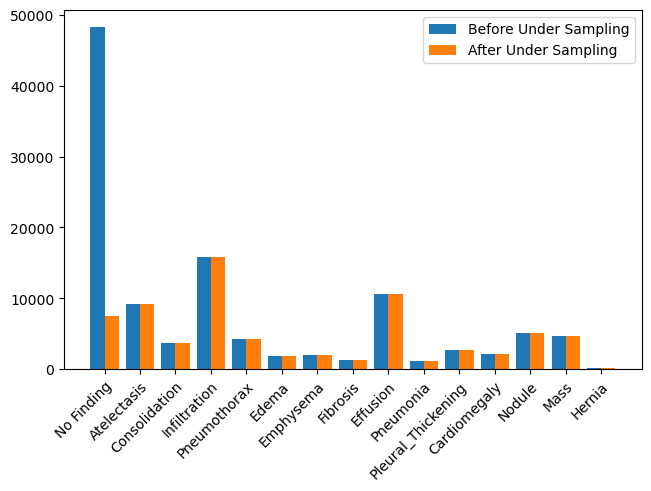

In [22]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(
    nrows=1, 
    ncols=1,
    constrained_layout = True,
)

X_LABELS = df_count_class.index
X_axis = np.arange(len(df_count_class))
ax1.set_xticks(X_axis, X_LABELS)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax1.bar(X_axis - 0.2, df_count_class["Count"], 0.4, label="Before Under Sampling")
ax1.bar(X_axis + 0.2, df_count_class_new["Count"], 0.4, label="After Under Sampling")
plt.legend()
plt.show()

In [23]:
print(f"""\
Dataset Infomation:
    >> Train: {len(df_train) :,}
    >> Test: {len(df3) :,}
    >> Total: {len(df) :,}
""")

Dataset Infomation:
    >> Train: 89,696
    >> Test: 22,424
    >> Total: 112,120



In [24]:
print(f"""\
Dataset Infomation:
    >> Train: {len(new_df_train) :,}
    >> Test: {len(df3) :,}
    >> Total: {len(pd.concat([new_df_train, df3])) :,}
""")

Dataset Infomation:
    >> Train: 48,995
    >> Test: 22,424
    >> Total: 112,120



In [25]:
NUM_TO_SPLIT_FILES = 100

In [26]:
# Train
for i, data in tqdm(
    enumerate(np.array_split(new_df_train, NUM_TO_SPLIT_FILES)),
    total=NUM_TO_SPLIT_FILES
):
    serialize_fold(
        data, 
        name=f'{OUT_TRAIN_PATH}/{i:03d}-{len(data):03d}'
    )

  0%|          | 0/100 [00:00<?, ?it/s]

2023-03-10 16:30:07.538251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 16:30:09.335336: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31693 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:b1:00.0, compute capability: 8.0
2023-03-10 16:40:01.732947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2023-03-10 16:42:31.185489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


In [27]:
# Test
for i, data in tqdm(
    enumerate(np.array_split(df_test, NUM_TO_SPLIT_FILES)),
    total=NUM_TO_SPLIT_FILES
):
    serialize_fold(
        data, 
        name=f'{OUT_TEST_PATH}/{i:03d}-{len(data):03d}'
    )

  0%|          | 0/100 [00:00<?, ?it/s]